In [1]:
## Exercice 1

In [4]:
%matplotlib inline   
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [5]:
def f(x):
    return x


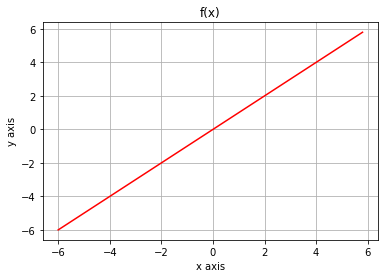

In [6]:
x = np.arange(-6,6,0.2)
y = f(x)

plt.plot(x,y,'r-')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('f(x)')
plt.grid(True)
plt.show()

In [7]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig

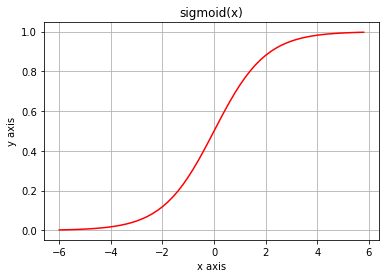

In [8]:
z = sigmoid(x)

plt.plot(x,z,'r-')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('sigmoid(x)')
plt.grid(True)
plt.show()

In [9]:
## Exercice 2

In [10]:
# 2.
fid = open('GTI770_label_data_set.csv', 'r') 
next(fid) # skip les headers (la premiere ligne)

classDict = {}

X = np.zeros((100, 3, 424, 424), dtype=int)
Y = np.zeros((100, 2), dtype=object)

count = 0
for line in fid:
    element = line.rstrip('\n').split(',')
    
    if element[1] not in classDict:
        classDict[element[1]] = 0     
    elif element[1] in classDict and classDict[element[1]] < 50:
        classDict[element[1]] += 1;
    else:
        continue
    
    imagePath = 'images/' + element[0] + '.jpg'
    if not os.path.exists(imagePath):
        classDict[element[1]] -= 1    # S'assure d'avoir des images qui existe
        continue
        
    img = cv2.imread(imagePath).reshape(3,424,424)
    img = img[:, :, ::-1]
    
    X[count] = img
    Y[count] = [count, element[1]]
    
    count += 1
    if count >= 100:
        break

fid.close() 

Smooth :


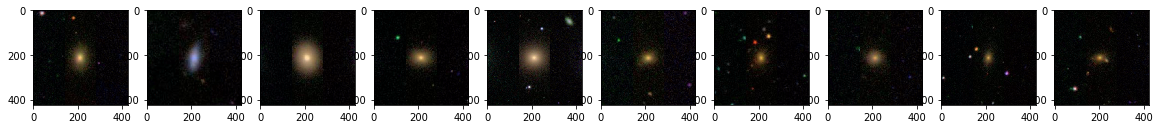

Spiral :


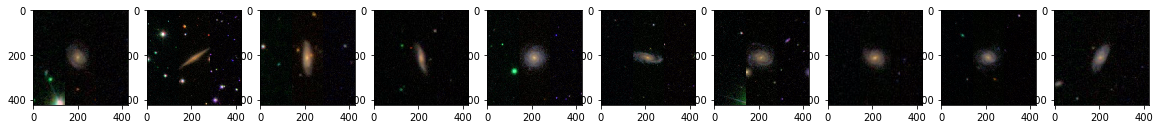

In [11]:
# 3.

def GenerateRandomNumbersList(ArangeLength, GeneratedSetLength):
    a = np.arange(ArangeLength)
    np.random.shuffle(a)
    randomSet = a[:GeneratedSetLength]
    return randomSet

rand1 = GenerateRandomNumbersList(50, 10)
rand2 = GenerateRandomNumbersList(50, 10)

YSorted = Y[Y[:,1].argsort()]
listSmooth = YSorted[:len(YSorted)//2]
listSpiral = YSorted[len(YSorted)//2:]

def RandomList(list, randNumbers):
    listRand = np.zeros((10, 3, 424, 424), dtype=int)
    for i in range(0, len(randNumbers)):
        randY = list[randNumbers[i]]        
        listRand[i] = X[randY[0]]
    return listRand
    
listRandSmooth = RandomList(listSmooth, rand1)
listRandSpiral = RandomList(listSpiral, rand2)

def ShowImageList(imageList):
    f, axarr = plt.subplots(1, len(imageList), figsize=(20,20))
    for i in range(0, len(imageList)):
        axarr[i].imshow(imageList[i].reshape(len(imageList[0][0]),len(imageList[0][0][0]),3))      
    plt.show()
    
print("Smooth :")
ShowImageList(listRandSmooth)
print("Spiral :")
ShowImageList(listRandSpiral)

In [12]:
#4.
Y_train = np.concatenate((listSmooth[:35], listSpiral[:35]), axis=0)
Y_test = np.concatenate((listSmooth[-15:], listSpiral[-15:]))

def GenerateXFromY(listY):
    listX = np.zeros((len(listY), 3, 424, 424), dtype=int)
    for i in range(len(listY)):
        imageIndex = listY[i]
        listX[i] = X[imageIndex[0]]
    return listX

X_train = GenerateXFromY(Y_train)
X_test = GenerateXFromY(Y_test)

#----------------------
#For debug :
# print(len(Y_train))
# print(Y_train)
# print(len(Y_test))
# print(Y_test)
# print(len(X_train))
# print(len(X_test))
#----------------------

In [13]:
#5.

def crop(img,cropx,cropy):
    x,y,rgb = img.shape #Prend les valeurs de l'image
    startx = x//2-(cropx//2) #Trouve la nouvelle coordonnée startx
    starty = y//2-(cropy//2) #Trouve la nouvelle coordonnée starty
    return img[startx:startx+cropx,starty:starty+cropy] #Réajuste l'image selon les nouvelle coordonnée et la longueur du crop

X_train_crop = np.zeros((len(X_train), 3, 50, 50), dtype=int)
for i in range(0, len(X_train)):
    X_train_crop[i] = crop(X_train[i].reshape(424, 424, 3),50,50).reshape(3, 50, 50)
    
#-----------------------
#For Debug :
# print(len(X_train_crop))
# print(len(X_train_crop[0][0]))
# print(len(X_train_crop[0][0][0]))
#-----------------------    

Smooth - cropped (left) vs untouched (right) :


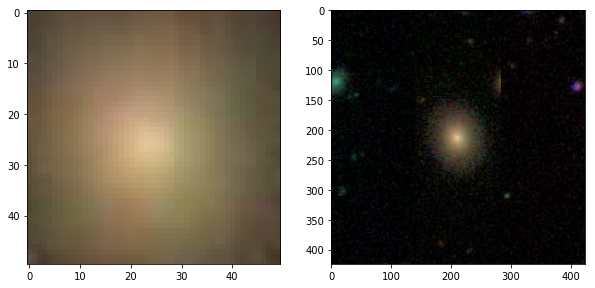

Spiral - cropped (left) vs untouched (right) :


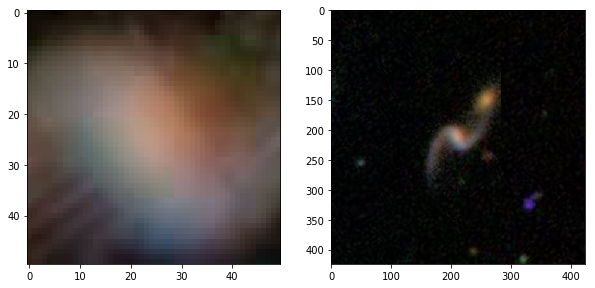

In [14]:
#6.

def showCropComparison(imgIndex):
    img = X_train[imgIndex].reshape(424,424,3)
    img_cropped = np.zeros((50, 50, 3), dtype=int)
    img_cropped =  X_train_crop[imgIndex].reshape(50,50,3)
    f, axarr = plt.subplots(1, 2, figsize=(10,10))
    axarr[0].imshow(img_cropped)
    axarr[1].imshow(img)
    plt.show()
    
print("Smooth - cropped (left) vs untouched (right) :")
showCropComparison(0)
print("Spiral - cropped (left) vs untouched (right) :")
showCropComparison(58)


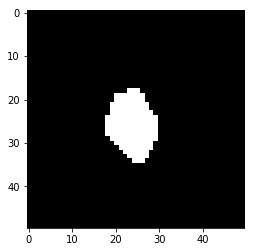

In [15]:
#7.

def RgbToGray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]) #Transforme l'image couleur en grayscale

X_train_binary = np.zeros((len(X_train_crop), 50, 50), dtype=float)
for i in range(0, len(X_train_crop)):
    grayscale = RgbToGray(X_train_crop[i].reshape(50,50,3))
    thresh_img = np.where(grayscale>128, 255, 0)
    X_train_binary[i] = thresh_img

#-------------------------------------------
#For debug :
plt.imshow(X_train_binary[45], cmap=plt.cm.gray)
#plt.imshow(X_train_crop[52].reshape(50,50,3))
#-------------------------------------------

In [16]:
#8.

#Le fait d'avoir une matrice avec le nombre de pixels noires et blanches permet de faire le différence entre
#les galaxies de type "spiral" et "smooth". Les spirals ont tendence à être plus étendu et on donc moins de pixels blanches que 
#les galaxies de types smooth qui ont tendence de faire des taches blanches plus prononcées.

X_train_plot = np.zeros((len(X_train_binary), 2), dtype=int)
for i in range(0, len(X_train_binary)):
    X_train_plot[i][0] = np.sum(X_train_binary[i] == 255) #Number of white pixels
    X_train_plot[i][1] = np.sum(X_train_binary[i] == 0) #Number of black pixels

#-------------------------------------------
#For debug :
#print(X_train_plot)
#-------------------------------------------

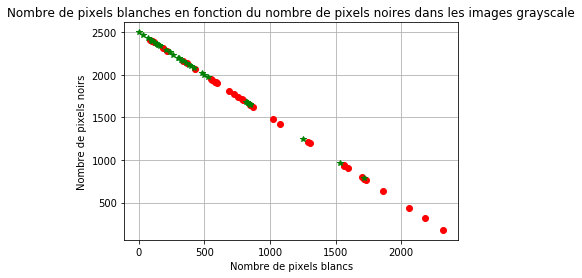

In [21]:
#9.

length_smooth = 0
length_spiral = 0

for element in Y_train :
    if element[1] == "smooth" :
        length_smooth += 1
    elif element[1] == "spiral" :
        length_spiral += 1
        
X_coord_smooth = np.zeros(length_smooth, dtype=int)
Y_coord_smooth = np.zeros(length_smooth, dtype=int)
X_coord_spiral= np.zeros(length_spiral, dtype=int)
Y_coord_spiral = np.zeros(length_spiral, dtype=int)

count_smooth = 0
count_spiral = 0
for i in range(0, len(X_train_plot)):
    if Y_train[i][1] == "smooth" :
        X_coord_smooth[count_smooth] = X_train_plot[i][0]
        Y_coord_smooth[count_smooth] = X_train_plot[i][1]
        count_smooth += 1
    elif Y_train[i][1] == "spiral" :
        X_coord_spiral[count_spiral] = X_train_plot[i][0]
        Y_coord_spiral[count_spiral] = X_train_plot[i][1]
        count_spiral += 1
    
plt.plot(X_coord_smooth, Y_coord_smooth, 'ro')
plt.plot(X_coord_spiral, Y_coord_spiral, 'g*')
plt.xlabel('Nombre de pixels blancs')
plt.ylabel('Nombre de pixels noirs')
plt.title('Nombre de pixels blanches en fonction du nombre de pixels noires dans les images grayscale binaire')
plt.grid(True)
plt.show()

In [125]:
#separate color channels

X_train_crop_red = np.zeros((len(X_train_crop),50, 50), dtype=int)
X_train_crop_green = np.zeros((len(X_train_crop),50, 50), dtype=int)
X_train_crop_blue_high = np.zeros((len(X_train_crop),50, 50), dtype=int)
X_train_crop_blue_mid = np.zeros((len(X_train_crop),50, 50), dtype=int)

def ShowColorComparison(imgIndex):
    img = X_train[imgIndex].reshape(424,424,3)
    img_cropped = np.zeros((50, 50, 3), dtype=int)
    img_cropped =  X_train_crop[imgIndex].reshape(50,50,3)
    f, axarr = plt.subplots(1, 7, figsize=(20,20))
    axarr[0].imshow(img)
    axarr[1].imshow(img_cropped)
    
    img_red = np.zeros((50, 50, 1), dtype=int)
    img_green = np.zeros((50, 50, 1), dtype=int)
    img_blue_high = np.zeros((50, 50, 1), dtype=int)
    img_blue_mid = np.zeros((50, 50, 1), dtype=int)
    img_red, img_green, img_blue_high, img_blue_mid = SplitColors(img_cropped)
    
    axarr[2].imshow(img_red, cmap=plt.cm.Reds)
    axarr[3].imshow(img_green, cmap=plt.cm.Greens)
    axarr[4].imshow(img_blue, cmap=plt.cm.Blues)
    axarr[5].imshow(X_train_binary[imgIndex], cmap=plt.cm.gray)
    axarr[6].imshow(img_blue2, cmap=plt.cm.gray)
    plt.show()
    
def SplitRgb(rgb, th_red, th_green, th_blue):
    red = rgb[:, :, 0] > th_red
    green = rgb[:, :, 1] > th_green
    blue = rgb[:, :, 2] > th_blue
    return red, green, blue

def ShowAll():
    for i in range(0, len(X_train)):
        print("%d- %s" %(i, Y_train[i][1]))
        ShowColorComparison(i)
        
def splitColors(img_cropped):
    img_red = np.zeros((50, 50, 1), dtype=int)
    img_green = np.zeros((50, 50, 1), dtype=int)
    img_blue_high = np.zeros((50, 50, 1), dtype=int)
    img_blue_mid = np.zeros((50, 50, 1), dtype=int)
    img_red, img_green, img_blue_high = SplitRgb(img_cropped, 200, 160, 160)
    img_blue_mid = np.where(img_cropped[:,:,2]>90, 255, 0)
    return img_red, img_green, img_blue_high, img_blue_mid

def SplitAllImagesColors():
    img_red = np.zeros((50, 50, 1), dtype=int)
    img_green = np.zeros((50, 50, 1), dtype=int)
    img_blue_high = np.zeros((50, 50, 1), dtype=int)
    img_blue_mid = np.zeros((50, 50, 1), dtype=int)
    
    for i in range(0, len(X_train_crop)):
        img_red, img_green, img_blue_high, img_blue_mid = splitColors(X_train_crop[i].reshape(50,50,3))
        X_train_crop_red[i] = img_red
        X_train_crop_green[i] = img_green
        X_train_crop_blue_high[i] = img_blue_high
        X_train_crop_blue_mid[i] = img_blue_mid

SplitAllImagesColors()
        
#-------------------------------------------
#For debug :
# ShowAll()

#print(len(X_train_crop_green))
#print(len(X_train_crop_blue_high))
#print(len(X_train_crop_blue_mid))
#-------------------------------------------

In [126]:
#notes
# if nb_pixel_white in each_channels > 50 ==> smooth
# if nb_pixel_white in grayscale > 600 ==> smooth
# blue2_nb_pixel_white > grayscale_nb_pixel_white ==> spiral
# green == center, center + blue ==> spiral
#



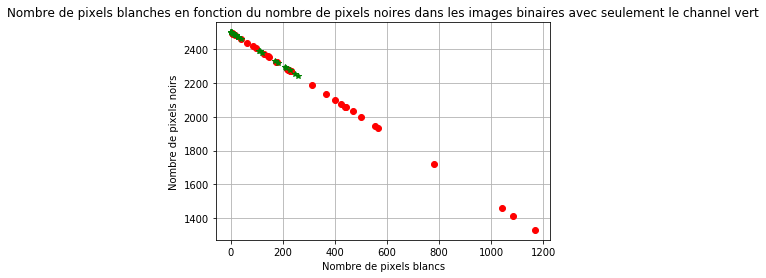

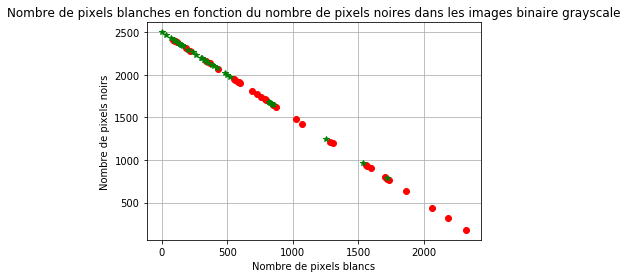

In [164]:
#Intensité du centre

def TracePlot(array, titre, titre_x, titre_y):        
    length_smooth = 0
    length_spiral = 0

    for element in Y_train :
        if element[1] == "smooth" :
            length_smooth += 1
        elif element[1] == "spiral" :
            length_spiral += 1
            
    X_coord_smooth = np.zeros(length_smooth, dtype=float)
    Y_coord_smooth = np.zeros(length_smooth, dtype=float)
    X_coord_spiral= np.zeros(length_spiral, dtype=float)
    Y_coord_spiral = np.zeros(length_spiral, dtype=float)

    count_smooth = 0
    count_spiral = 0
    for i in range(0, len(X_train)):
        if Y_train[i][1] == "smooth" :
            X_coord_smooth[count_smooth] = array[i][0]
            Y_coord_smooth[count_smooth] = array[i][1]
            count_smooth += 1
        elif Y_train[i][1] == "spiral" :
            X_coord_spiral[count_spiral] = array[i][0]
            Y_coord_spiral[count_spiral] = array[i][1]
            count_spiral += 1
    
    plt.plot(X_coord_smooth, Y_coord_smooth, 'ro')
    plt.plot(X_coord_spiral, Y_coord_spiral, 'g*')
    plt.xlabel(titre_x)
    plt.ylabel(titre_y)
    plt.title(titre)
    plt.grid(True)
    plt.show()
    
def ExtractNumberOfBlackAndWhitePixels(img_array):
    X_train_plot = np.zeros((len(X_train), 2), dtype=int)
    for i in range(0, len(X_train)): 
        X_train_plot[i][0] = np.sum(img_array[i] == 1) or np.sum(img_array[i] == 255) #Number of white pixels
        X_train_plot[i][1] = np.sum(img_array[i] == 0) #Number of black pixels
    return X_train_plot
    
# X_train_plot = np.zeros((len(X_train), 2), dtype=int)
# for i in range(0, len(X_train)):
#     X_train_plot[i][0] = np.sum(X_train_crop_green[i] == 1) #Number of white pixels
#     X_train_plot[i][1] = np.sum(X_train_crop_green[i] == 0) #Number of black pixels
# print(X_train_plot)
# print(X_train_crop_green[0][0][0])
TracePlot(ExtractNumberOfBlackAndWhitePixels(X_train_crop_green), 'Nombre de pixels blanches en fonction du nombre de pixels noires dans les images binaires avec seulement le channel vert', 'Nombre de pixels blancs', 'Nombre de pixels noirs')
TracePlot(ExtractNumberOfBlackAndWhitePixels(X_train_binary), 'Nombre de pixels blanches en fonction du nombre de pixels noires dans les images binaire grayscale', 'Nombre de pixels blancs', 'Nombre de pixels noirs')


[[ 0.          1.01502504]
 [ 0.          1.10719194]
 [ 0.          1.27546445]
 [ 0.          0.44047619]
 [ 0.          1.05761719]
 [ 0.          0.42517007]
 [ 0.          0.55523256]
 [ 0.          0.60490463]
 [ 0.          0.20181818]
 [ 0.          0.        ]
 [ 0.          1.07665805]
 [ 0.          1.01234568]
 [ 0.          1.09205426]
 [ 0.          1.50572082]
 [ 0.          0.20465116]
 [ 0.          1.86743295]
 [ 0.          0.80232558]
 [ 0.          0.        ]
 [ 0.          0.68219944]
 [ 0.          1.12324393]
 [ 0.          2.56772674]
 [ 0.          1.44175317]
 [ 0.          0.16091954]
 [ 0.          1.53354232]
 [ 0.          0.33512545]
 [ 0.          0.10526316]
 [ 0.          0.82847341]
 [ 0.          1.09877978]
 [ 0.          1.42655699]
 [ 0.          0.62937063]
 [ 0.          0.54339623]
 [ 0.          1.32806324]
 [ 0.          0.49362245]
 [ 0.          0.        ]
 [ 0.          0.03581267]
 [ 1.          0.66009852]
 [ 1.          0.72228989]
 

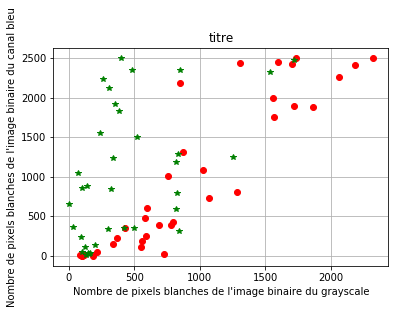

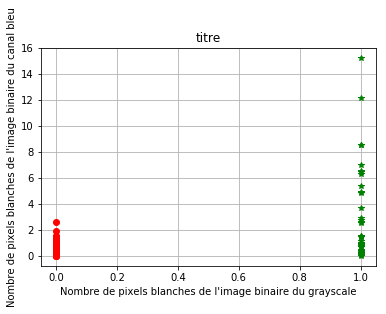

In [175]:
# blue2_nb_pixel_white > grayscale_nb_pixel_white ==> spiral

def ExtractNbOfBluePixelsVersusWhitePixelsInGrayscale():
    X_train_plot = np.zeros((len(X_train), 2), dtype=float)
    for i in range(0, len(X_train)): 
        X_train_plot[i][0] = np.sum(X_train_binary[i] == 255)
        X_train_plot[i][1] = np.sum(X_train_crop_blue_mid[i] == 255) #or np.sum(X_train_crop_blue_mid[i] == 255)
    return X_train_plot

def ExtractRatioOfBluePixelsVersusWhitePixelsInGrayscale():
    X_train_plot = np.zeros((len(X_train), 2), dtype=float)
    for i in range(0, len(X_train)): 
        if Y_train[i][1] == "smooth" :
            X_train_plot[i][0] = 0
        elif Y_train[i][1] == "spiral" :
            X_train_plot[i][0] = 1
        if np.sum(X_train_binary[i] == 255) == 0 :
            X_train_plot[i][1] = 0
        else :
            X_train_plot[i][1] = np.sum(X_train_crop_blue_mid[i] == 255) / np.sum(X_train_binary[i] == 255)
    return X_train_plot
        
def NumberOfRatioHigherThan(ratio, array):
    totalSmooth = 0
    totalSpiral = 0
    for i in range(0, len(X_train)):
        if Y_train[i][1] == "smooth":
            totalSmooth = np.sum(array[i][1] > ratio, dtype=float)
        elif Y_train[i][1] == "spiral":
            totalSpiral = np.sum(array[i][1] > ratio)
    return totalSmooth, totalSpiral

arrayOfThings = ExtractRatioOfBluePixelsVersusWhitePixelsInGrayscale()
print(arrayOfThings)
nbSmooth, nbSpiral = NumberOfRatioHigherThan(2.0, arrayOfThings)
print("Nbr smooth = %d, Nbr spiral = %d" %(nbSmooth, nbSpiral))
    
TracePlot(ExtractNbOfBluePixelsVersusWhitePixelsInGrayscale(), "titre", "Nombre de pixels blanches de l'image binaire du grayscale", "Nombre de pixels blanches de l'image binaire du canal bleu")
TracePlot(ExtractRatioOfBluePixelsVersusWhitePixelsInGrayscale(), "titre", "Nombre de pixels blanches de l'image binaire du grayscale", "Nombre de pixels blanches de l'image binaire du canal bleu")